# Building a Fully Connected Network (FCN) for Devnagari Digit Classification.

## Task 1: Data Preparation
**Loading the Data**

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [33]:
test_data = "/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 4/DevanagariHandwrittenDigitDataset/Test"
train_data = "/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 4/DevanagariHandwrittenDigitDataset/Train"

In [34]:
def load_images(data_dir, image_size=(28, 28)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Consistent class labels from folder names
    class_map = {name: i for i, name in enumerate(class_names)}

    print("Class Map:", class_map)  #Check class map to ensure it's correct

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                try:
                    image = Image.open(file_path).convert('L')  #Convert to grayscale: Since Devnagari digits are in grayscale, converting them reduces unnecessary channels.
                    image = image.resize(image_size)
                    image_array = np.array(image) / 255.0  # Normalize pixel values
                    images.append(image_array)
                    labels.append(class_map[class_name])
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)

#Load images from train and test directories
X_train, y_train = load_images(train_data)
X_test, y_test = load_images(test_data)

#Check if the labels are within the correct range
print(np.unique(y_train))  # Ensure the values are within 0 to 9
print(np.unique(y_test))    # Ensure the values are within 0 to 9

Class Map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
Class Map: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Reshape and One-Hot Encoding Labels

In [35]:
#Reshape images to match the input shape required by FCN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#Convert labels to one-hot encoding
num_classes = len(np.unique(y_train))  # Adjust num_classes based on the actual number of unique labels
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

Verify Data

Training Data Shape: (17270, 28, 28, 1), Labels: (17270, 10)
Testing Data Shape: (2737, 28, 28, 1), Labels: (2737, 10)


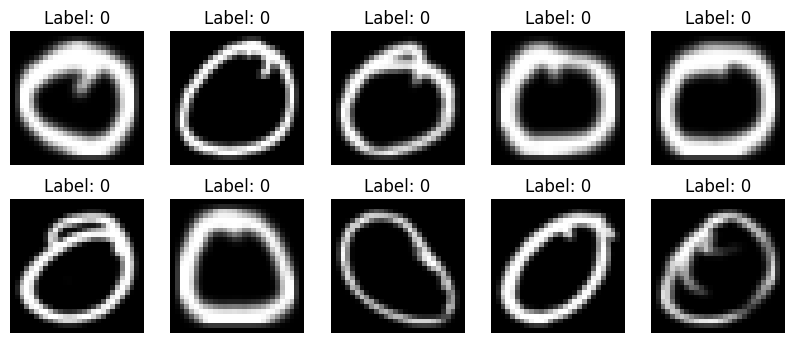

In [36]:
#Verify shapes
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")

#Displaying some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

## Task 2: Build the FCN Model

**Model Architecture**

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#FCN Model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),  #Hidden Layer 1: 64 neurons, sigmoid activation
    Dense(128, activation='sigmoid'),  #Hidden Layer 2: 128 neurons, sigmoid activation
    Dense(256, activation='sigmoid'),  #Hidden Layer 3: 256 neurons, sigmoid activation
    Dense(10, activation='softmax')  #Output layer: 10 units (for 10 classes), softmax activation
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Compile the Model
**Model Compilation**

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and evaluation metric (e.g., accuracy).

In [38]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Task 4: Train the Model
**Model Training**

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [41]:
batch_size = 130
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9992 - loss: 0.0085 - val_accuracy: 0.0151 - val_loss: 12.6184
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0069 - val_accuracy: 0.0151 - val_loss: 12.5672
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0060 - val_accuracy: 0.0151 - val_loss: 12.6384
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0053 - val_accuracy: 0.0151 - val_loss: 12.7934
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9997 - loss: 0.0043 - val_accuracy: 0.0151 - val_loss: 12.8658
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9998 - loss: 0.0034 - val_accuracy: 0.0151 - val_loss: 13.0330
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0037 - val_accuracy: 0.0151 - val_loss: 13.0965
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accur

## Task 5: Evaluate the Model
**Model Evaluation**

• After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

86/86 - 0s - 2ms/step - accuracy: 0.8604 - loss: 1.8686
Test accuracy: 0.8604


## Task 6: Save and Load the Model
**Model Saving and Loading**

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [49]:
model.save('/content/drive/MyDrive/6CS012 - Artificial Intelligence and Machine Learning/Week 4/devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(X_test, y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.2283


[1.868554711341858, 0.8604311347007751]

## Task 7: Predictions
**Making Predictions**

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [50]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

#displaying first 20 predictions
for i in range(20):
    print(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


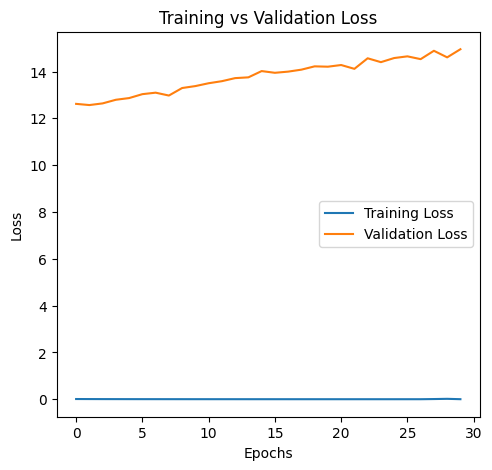

In [51]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()